In [1]:
from __future__ import print_function

import numpy as np
np.random.seed(1337)

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D


Using TensorFlow backend.


In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 3


In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = (2, 2)

# convolution kernel size
kernel_size = (3, 3)

In [5]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print ("shape of X_train :", X_train.shape)
print ("shape of X_test  :", X_test.shape)
print ("shape of y_train :", y_train.shape)


shape of X_train : (60000, 28, 28)
shape of X_test  : (10000, 28, 28)
shape of y_train : (60000,)


In [6]:
# convert to form of input of cnn
# standardize (0, 255)
# convert class vectors(y) to binary class matrices

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print ("shape of X_train :", X_train.shape)
print ("shape of X_test  :", X_test.shape)
print ("shape of Y_train :", Y_train.shape)


shape of X_train : (60000, 28, 28, 1)
shape of X_test  : (10000, 28, 28, 1)
shape of Y_train : (60000, 10)


In [7]:
model = Sequential()

model.add(Convolution2D(filters     = nb_filters,
                        kernel_size = (kernel_size[0], kernel_size[1]),
                        border_mode = 'valid',
                        activation  = 'relu',
                        input_shape = input_shape))
model.add(Convolution2D(filters     = nb_filters,
                        kernel_size = (kernel_size[0], kernel_size[1]),
                        activation  = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss     = 'categorical_crossentropy',
              optimizer= 'adadelta',
              metrics  = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
__________

/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1..., padding="valid")`


/Users/Shawn/anaconda/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
112s - loss: 0.4232 - acc: 0.8691 - val_loss: 0.0948 - val_acc: 0.9747
Epoch 2/3
108s - loss: 0.1582 - acc: 0.9541 - val_loss: 0.0640 - val_acc: 0.9825
Epoch 3/3
110s - loss: 0.1171 - acc: 0.9652 - val_loss: 0.0522 - val_acc: 0.9857


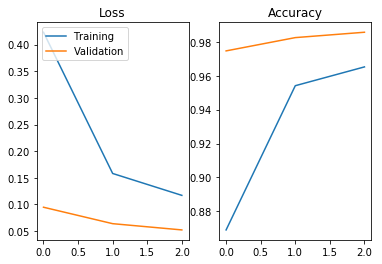

In [8]:
history = model.fit(x                = X_train,
                    y                = Y_train,
                    batch_size       = batch_size,
                    nb_epoch         = nb_epoch,
                    verbose          = 2,
                    shuffle          = True,
                    validation_split = 0.1)
                              
loss = history.history.get('loss')
acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss, label = 'Training')
plt.plot(range(len(val_loss)), val_loss, label = 'Validation')
plt.title('Loss')
plt.legend(loc = 'upper left')
plt.subplot(122)
plt.plot(range(len(acc)), acc, label = 'Training')
plt.plot(range(len(val_acc)), val_acc, label = 'Validation')
plt.title('Accuracy')
plt.show()


In [10]:
score, acc = model.evaluate(X_test, Y_test, batch_size = batch_size, verbose = 2)
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.0529906918712
Test accuracy: 0.9825
